# Initial Steps for KPI measurement- Time spent on each step

The initial steps for data analysis in Python include:

1. **Joining Datasets and Clean:** This involves combining the datasets for analytical purposes.  To measure this KPI, we will need to cocatenate df final web data pt 1 and 2 and df final experiment clients.  
 
2. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns and statistics. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

43. **Visualization:** To build intuitive graphs that show the outcome of the analytics.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Join Datasets and clean final dataframe

In [3]:
pt_1 = pd.read_csv('../Data/cleaned_pt_1.csv')
pt_2 = pd.read_csv('../Data/cleaned_pt_2.csv')
experiment = pd.read_csv('../Data/df_final_experiment_clients.txt')

In [4]:
pt_1.shape

(341046, 5)

In [5]:
#concatenate pt 1 and pt 2 and experiment and remove duplicated columns
df_kpi = pd.concat([pt_1, pt_2, experiment], axis=1)
df_kpi = df_kpi.loc[:,~df_kpi.columns.duplicated()]


In [6]:
df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Control
3,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Control
...,...,...,...,...,...,...
403590,NaN,NaN,NaN,NaN,NaN,NaN
403591,NaN,NaN,NaN,NaN,NaN,NaN
403592,NaN,NaN,NaN,NaN,NaN,NaN
403593,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#count how many rows have missing values
df_kpi.isnull().sum()

client_id        62549
visitor_id       62549
visit_id         62549
process_step     62549
date_time        62549
Variation       353095
dtype: int64

In [8]:
#remove missing values
df_kpi = df_kpi.dropna()

2. EDA



In [9]:
# Ensure date_time is in datetime format
df_kpi['date_time'] = pd.to_datetime(df_kpi['date_time'])

# Sort the DataFrame by visit_id and date_time
df_kpi = df_kpi.sort_values(by=['visit_id', 'date_time'])

# Calculate the time difference between consecutive steps within each visit_id
df_kpi['time_diff'] = df_kpi.groupby('visit_id')['date_time'].diff()





/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_51600/1893469820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi['date_time'] = pd.to_datetime(df_kpi['date_time'])


In [10]:
df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_diff
27351,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Test,NaT
27350,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,0 days 00:01:25
27349,5623007.0,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,0 days 00:00:39
27348,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,0 days 00:00:08
1609,4823947.0,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10,Test,NaT
...,...,...,...,...,...,...,...
8533,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:07,Test,0 days 00:00:18
8532,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:44,Test,0 days 00:00:37
8531,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_2,2017-04-13 10:32:53,Control,0 days 00:00:09
8530,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_3,2017-04-13 10:33:40,Control,0 days 00:00:47


In [11]:
#Then average these time differences for each step across all visits
df_kpi['avg_time_diff'] = df_kpi.groupby('process_step')['time_diff'].transform('mean')


In [12]:
df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_diff,avg_time_diff
27351,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Test,NaT,0 days 00:02:51.331135531
27350,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,0 days 00:01:25,0 days 00:02:51.331135531
27349,5623007.0,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,0 days 00:00:39,0 days 00:00:40.423951537
27348,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,0 days 00:00:08,0 days 00:02:51.331135531
1609,4823947.0,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10,Test,NaT,0 days 00:02:51.331135531
...,...,...,...,...,...,...,...,...
8533,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:07,Test,0 days 00:00:18,0 days 00:00:40.423951537
8532,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:44,Test,0 days 00:00:37,0 days 00:00:40.423951537
8531,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_2,2017-04-13 10:32:53,Control,0 days 00:00:09,0 days 00:00:43.173280857
8530,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_3,2017-04-13 10:33:40,Control,0 days 00:00:47,0 days 00:01:33.755428571


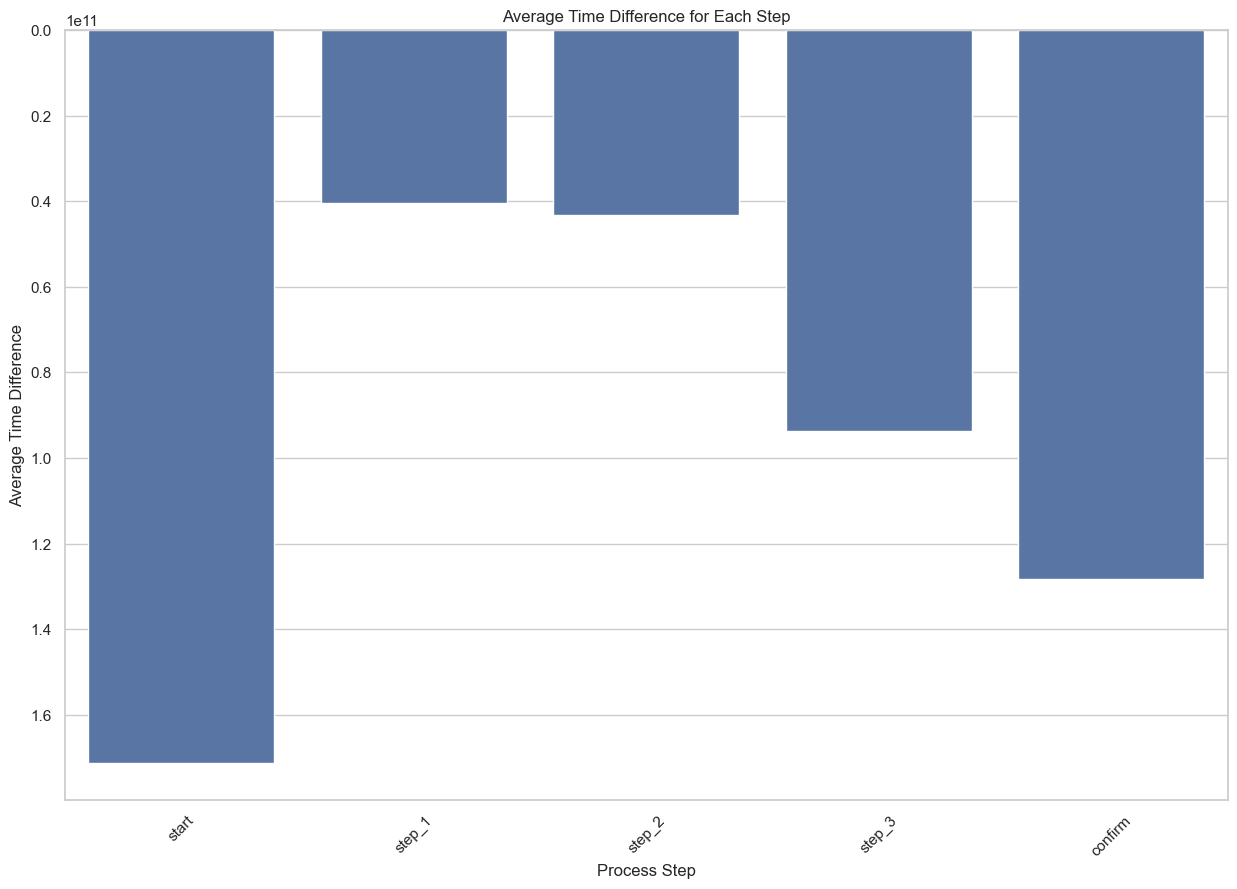

In [13]:
#plot the average time difference for each step
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='process_step', y='avg_time_diff', data=df_kpi)
plt.title('Average Time Difference for Each Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Difference')
plt.xticks(rotation=45)
plt.show()


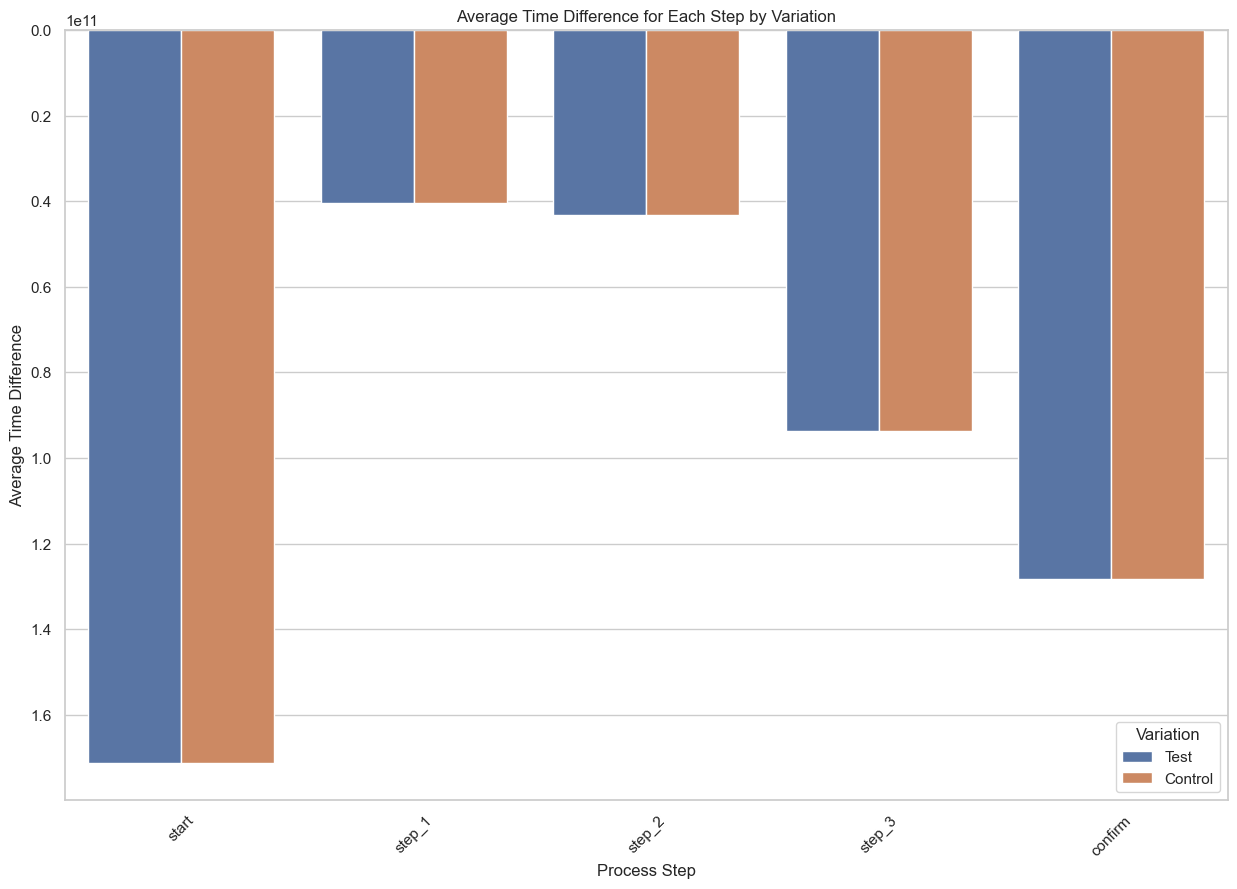

In [14]:
#plot by variation and process step
plt.figure(figsize=(15, 10))
sns.barplot(x='process_step', y='avg_time_diff', hue='Variation', data=df_kpi)
plt.title('Average Time Difference for Each Step by Variation')
plt.xlabel('Process Step')
plt.ylabel('Average Time Difference')
plt.xticks(rotation=45)
plt.show()


In [15]:
#variation column number of values
df_kpi['Variation'].value_counts()

Test       26968
Control    23532
Name: Variation, dtype: int64

In [16]:
#group the dataframe by test and control variation
df_kpi_grouped = df_kpi.groupby('Variation').agg({'avg_time_diff': 'mean'}).reset_index()

In [17]:
df_kpi_grouped

,Variation,avg_time_diff
0,Control,0 days 00:01:42.141989376
1,Test,0 days 00:01:41.912672861


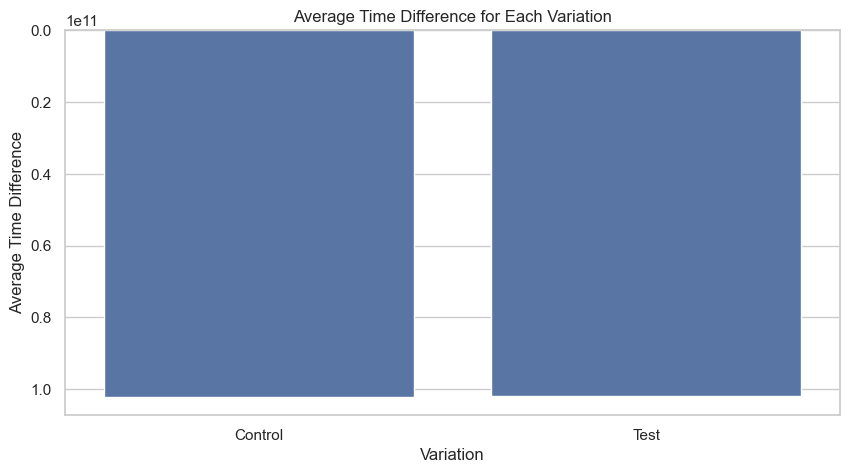

In [18]:
#plot the average time difference for each variation
plt.figure(figsize=(10, 5))
sns.barplot(x='Variation', y='avg_time_diff', data=df_kpi_grouped)
plt.title('Average Time Difference for Each Variation')
plt.xlabel('Variation')
plt.ylabel('Average Time Difference')
plt.show()


Save Time spent on each step in a file :

In [19]:
df_kpi_grouped.to_csv('../Data/time_spent_on_each_step.csv', index=False)